In [294]:
import os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt 
import PIL

# Model-Related
import tensorflow as tf
from tensorflow.keras import layers
import pydot, graphviz

# Data Preprocessing
from sklearn.model_selection import train_test_split

### Emotion Recognition in Visual Data

This module Extracts / Preprocesses & Explores data from the following datasets:
- CK+  
- Microsoft FER+

It will have a Convolutional Neural Network implemented with Keras + TensorFlow back-end and trained on this data.

We will be creating testing sets of the three team members capturing themselves.


### CK+ Dataset

In [295]:
def getCK():
    ck_data = h5py.File('../Datasets/CK_data.h5', 'r')
    
    X = np.array(ck_data.get('data_pixel'))
    y = np.array(ck_data.get('data_label'))
    
    return X, y

def splitTrainValidate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)
    
    return X_train, y_train, X_test, y_test



### Image Classification with Convolutional Neural Network

- Using Keras with Tensorflow Back-end to Design, Train, Tune & Test a CNN

In [343]:
# Get CK+ Dataset
X_CK, y_CK = getCK()

In [344]:
X_train, y_train, X_test, y_test = splitTrainValidate(X_CK, y_CK)

print("Training Data: ", X_train.shape)
print("Training Labels", y_train.shape)
print("Validation Data: ", X_test.shape)
print("Validation Labels: ",y_test.shape)

Training Data:  (882, 48, 48)
Training Labels (882,)
Validation Data:  (99, 48, 48)
Validation Labels:  (99,)


In [345]:
emotion_labels = ['Anger','Disgust','Fear','Happy','Sadness','Surprise', 'Contempt']

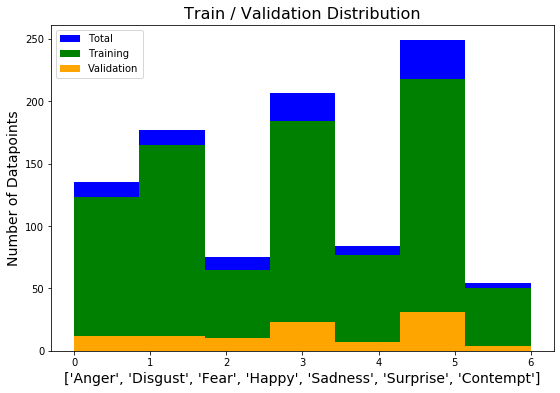

In [350]:
plt.figure(figsize = (9, 6) )
plt.xlabel(emotion_labels, size = 14)
plt.ylabel('Number of Datapoints', size = 14)
plt.hist(y_CK, bins = 7, color = 'blue')
plt.hist(y_train, bins = 7, color = 'green');
plt.hist(y_test, bins = 7, color = 'orange');
plt.legend(['Total', 'Training', 'Validation'])
plt.title("Train / Validation Distribution", size = 16);

In [331]:
# Prepare inputs.
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = np.float32(X_train) / X_train.max()
y_train = tf.keras.utils.to_categorical(y_train)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = np.float32(X_test) / X_test.max()
y_test = tf.keras.utils.to_categorical(y_test)

In [332]:
generate_data = tf.keras.preprocessing.image.ImageDataGenerator(
                rotation_range = 30,
                shear_range = 0.2,
                horizontal_flip = True,
)  

In [333]:
model_ck = tf.keras.models.Sequential([
    
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),

        tf.keras.layers.Conv2D(32, kernel_size = (5, 5), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, kernel_size = (5, 5), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Conv2D(64, kernel_size = (4, 4), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (4, 4), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(256, kernel_size = (2, 2), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, kernel_size = (2, 2), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation = 'relu'),
        tf.keras.layers.Dense(1024, activation = 'relu'),
        tf.keras.layers.Dense(512, activation = 'relu'),
    
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation = 'softmax')
])

model_ck.compile(optimizer = tf.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.CategoricalAccuracy()])
model_ck_hist = model_ck.fit(X_train, y_train, batch_size = 16, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
56/56 [==============================] - 10s 172ms/step - loss: 2.4533 - categorical_accuracy: 0.2143 - val_loss: 1.9106 - val_categorical_accuracy: 0.1414
Epoch 2/50
56/56 [==============================] - 9s 169ms/step - loss: 1.8009 - categorical_accuracy: 0.2732 - val_loss: 1.9573 - val_categorical_accuracy: 0.1414
Epoch 3/50
56/56 [==============================] - 10s 171ms/step - loss: 1.6709 - categorical_accuracy: 0.3231 - val_loss: 1.9331 - val_categorical_accuracy: 0.0909
Epoch 4/50
56/56 [==============================] - 11s 193ms/step - loss: 1.5068 - categorical_accuracy: 0.3844 - val_loss: 2.0256 - val_categorical_accuracy: 0.1111
Epoch 5/50
56/56 [==============================] - 11s 199ms/step - loss: 1.4277 - categorical_accuracy: 0.4490 - val_loss: 2.3836 - val_categorical_accuracy: 0.0909
Epoch 6/50
56/56 [==============================] - 11s 200ms/step - loss: 1.3762 - categorical_accuracy: 0.4478 - val_loss: 3.3021 - val_categorical_accuracy: 0.0909

Epoch 50/50
56/56 [==============================] - 11s 199ms/step - loss: 0.6395 - categorical_accuracy: 0.7789 - val_loss: 0.4967 - val_categorical_accuracy: 0.8182


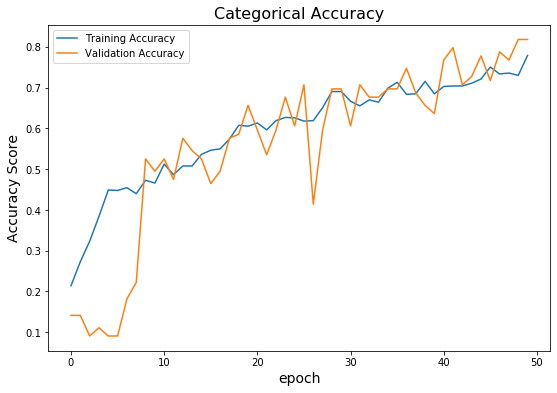

In [358]:
plt.figure(figsize = (9, 6))

plt.plot(model_ck_hist.history['categorical_accuracy'])
plt.plot(model_ck_hist.history['val_categorical_accuracy']);
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Accuracy Score', size = 14)
plt.title('Categorical Accuracy', size = 16)
plt.show()


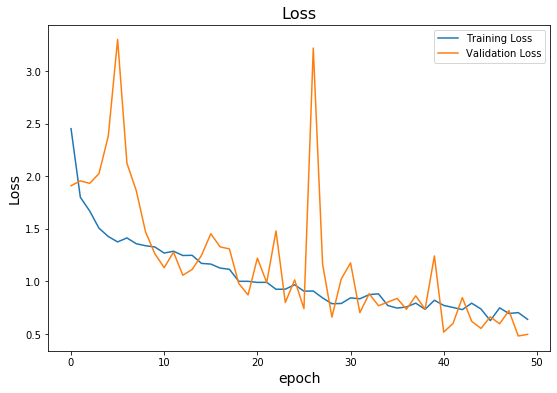

In [357]:
plt.figure(figsize = (9, 6))

plt.plot(model_ck_hist.history['loss'])
plt.plot(model_ck_hist.history['val_loss']);
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Loss', size = 14)
plt.title('Loss', size = 16)
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


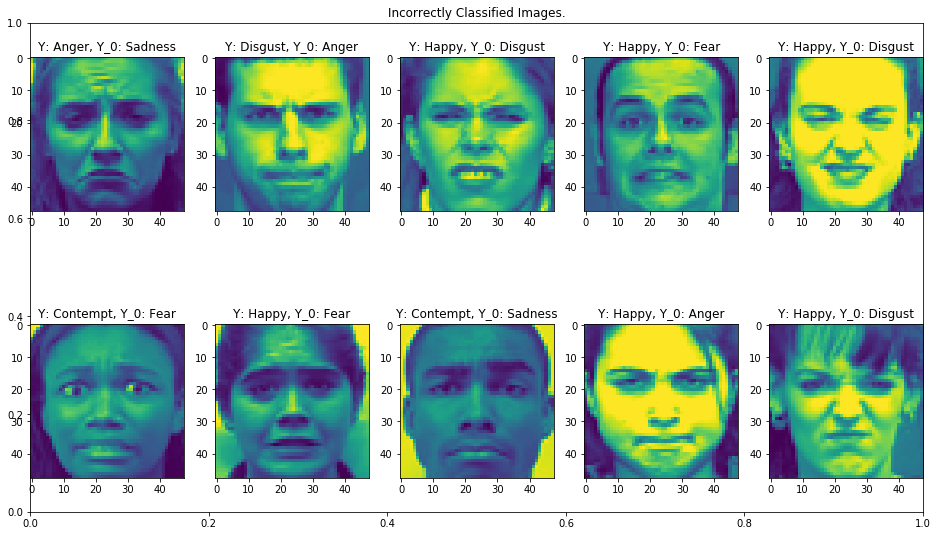

In [309]:
pred = model_ck.predict_classes(X_test)

emotion_labels = ['Anger','Disgust','Fear','Happy','Sadness','Surprise', 'Contempt']

figure = plt.figure(figsize = (16, 9))

i = 0
imgcount = 1
plt.title('Incorrectly Classified Images.')

while imgcount < 11:
    
    if(y_test[i].argmax() != pred[i]):
        figure.add_subplot(2, 5, imgcount)
        plt.imshow(X_test[i].reshape((48, 48)))
        imgcount += 1
        plt.title('Y: '+ emotion_labels[pred[i]] +  ', Y_0: ' + emotion_labels[y_test[i].argmax()])
        
    i += 1
    
plt.show()

In [13]:
model_ck.save("ck_model_81.h5")

### FER+ Dataset

In [147]:
from io import StringIO

def parsePixels(pixelString):
    data = pixelString.split(" ")
        
    return data


def loadFER():
    fer_data = getFER()
    
# Saves The data in PNG format Locally.

#     fer_training = fer_data[fer_data['Usage'] == 'Training']    
#     fer_validation_private = fer_data[fer_data['Usage'] == 'PrivateTest']
#     fer_validation_public = fer_data[fer_data['Usage'] == 'PublicTest']
    
#     # Save Training Images Locally
#     for idx, each in enumerate(fer_training['pixels']):
#         fer_training['pixels'].values[idx] =  np.asarray(fer_training['pixels'][idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_training['pixels'][idx])
#         img.save('../Datasets/FER2013/FER_TRAIN/' + 'fer_train_' + str(idx) + '.png')
        
#     # Save Training Labels
#     fer_training_y = fer_training['emotion']

#     # Save Validation Images (Private)
#     for idx, each in enumerate(fer_validation_private['pixels']):
#         fer_validation_private['pixels'].iloc[idx] = np.asarray(fer_validation_private['pixels'].iloc[idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_validation_private['pixels'].iloc[idx])
#         img.save('../Datasets/FER2013/FER_VAL_PRIVATE/' + 'fer_val_private_' + str(idx) + '.png')
        
#     # Save Validation Labels (Private)    
#     fer_validation_private_y = fer_validation_private['emotion']    
        
#     # Save Validation Images (Public)
#     for idx, each in enumerate(fer_validation_public['pixels']):
#         fer_validation_public['pixels'].iloc[idx] = np.asarray(fer_validation_public['pixels'].iloc[idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_validation_public['pixels'].iloc[idx])
#         img.save('../Datasets/FER2013/FER_VAL_PUBLIC/' + 'fer_val_public' + str(idx) + '.png')
        
#     # Save Validation Labels (Public)    
#     fer_validation_public_y = fer_validation_public['emotion']    
    
    # Prepare data
    pixels = fer_data['pixels'].tolist()
    parsed_pixels = []
    
    for pix_sequence in pixels:
        picture = parsePixels(pix_sequence)
        picture = np.asarray(picture, dtype = np.uint8).reshape(48, 48)
        parsed_pixels.append(picture)

    parsed_pixels = np.asarray(parsed_pixels)
    parsed_pixels = np.expand_dims(parsed_pixels, -1)
    
    emotion_labels = np.matrix(fer_data['emotion'])
    emotion_labels = emotion_labels.reshape(emotion_labels.shape[1], 1)
    

def getFER():
    fer_data = pd.read_csv('../Datasets/fer2013.csv')
    
    return fer_data
    

In [148]:
# Get FER+ Dataset
fer_pixels, fer_labels = loadFER()

In [149]:
X_train, y_train, X_test, y_test = splitTrainValidate(fer_pixels, fer_labels)

print("Training Data: ", X_train.shape)
print("Training Labels", y_train.shape)
print("Validation Data: ", X_test.shape)
print("Validation Labels: ",y_test.shape)

Training Data:  (32298, 48, 48, 1)
Training Labels (32298, 1)
Validation Data:  (3589, 48, 48, 1)
Validation Labels:  (3589, 1)


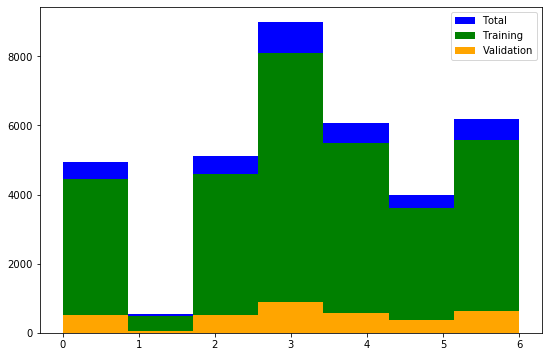

In [159]:
plt.figure(figsize = (9, 6))
plt.hist(fer_labels, bins = 7, color = 'blue')
plt.hist(y_train, bins = 7, color = 'green')
plt.hist(y_test, bins = 7, color = 'orange')
plt.legend(['Total', 'Training', 'Validation'])

In [253]:
fer_labels = ['Fear', 'Disgust', 'Anger' ,'Happiness' , 'Sadness', 'Surprise','Neutral']

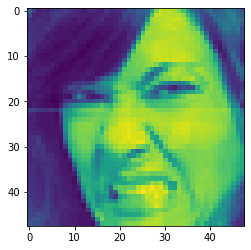

In [292]:
for idx, each in enumerate(X_train):
    if y_train[idx] == 1:
        plt.imshow(X_train[idx].reshape(48, 48))

In [20]:
# Prepare inputs.
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = np.float32(X_train) / X_train.max()
y_train = tf.keras.utils.to_categorical(y_train)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = np.float32(X_test) / X_test.max()
y_test = tf.keras.utils.to_categorical(y_test)

In [38]:
model = tf.keras.models.Sequential([
    
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.15),
    
        tf.keras.layers.Conv2D(32, kernel_size = (5, 5), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, kernel_size = (5, 5), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(64, kernel_size = (5, 5), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (5, 5), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = (1, 1), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(256, kernel_size = (2, 2), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, kernel_size = (1, 1), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, kernel_size = (2, 2), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Conv2D(512, kernel_size = (2, 2), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512, kernel_size = (1, 1), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512, kernel_size = (2, 2), padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(2048, activation = 'relu'),    
        tf.keras.layers.Dense(2048, activation = 'relu'),
        tf.keras.layers.Dense(1024, activation = 'relu'),
    
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation = 'softmax')
])

model.compile(optimizer = tf.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.CategoricalAccuracy()])

model_log = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_data = (X_test, y_test))


Epoch 1/10
505/505 [==============================] - 536s 1s/step - loss: 1.9189 - categorical_accuracy: 0.2374
Epoch 2/10
505/505 [==============================] - 523s 1s/step - loss: 1.8040 - categorical_accuracy: 0.2433
Epoch 3/10
505/505 [==============================] - 494s 977ms/step - loss: 1.7769 - categorical_accuracy: 0.2617
Epoch 4/10
505/505 [==============================] - 483s 957ms/step - loss: 1.7002 - categorical_accuracy: 0.3093
Epoch 5/10
505/505 [==============================] - 485s 961ms/step - loss: 1.6255 - categorical_accuracy: 0.3519
Epoch 6/10
505/505 [==============================] - 486s 963ms/step - loss: 1.5482 - categorical_accuracy: 0.3992
Epoch 7/10
505/505 [==============================] - 485s 960ms/step - loss: 1.4899 - categorical_accuracy: 0.4246
Epoch 8/10
505/505 [==============================] - 490s 970ms/step - loss: 1.4488 - categorical_accuracy: 0.4420
Epoch 9/10
505/505 [==============================] - 500s 990ms/step - loss: 

In [338]:
plt.plot(model_log.history['categorical_accuracy'])
plt.plot(model_log.history['val_categorical_accuracy']);
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Accuracy Score', size = 14)
plt.title('Categorical Accuracy', size = 16)
plt.show()

NameError: name 'model_log' is not defined

In [339]:
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss']);
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Loss', size = 14)
plt.title('Loss', size = 16)
plt.show()

NameError: name 'model_log' is not defined

In [40]:
model.evaluate(X_test, y_test)

113/113 [==============================] - 9s 79ms/step - loss: 1.4815 - categorical_accuracy: 0.4232


[1.4815136194229126, 0.423237681388855]

In [340]:
model.save("fer_model_42.h5")

NameError: name 'model' is not defined